### K-NEAREST NEIGHBOUR ALGORITHM (KNN)

* K-Nearest Neighbors (KNN) is a supervised machine learning algorithm generally used for classification but can also be used for regression tasks.



* It works by finding the "k" closest data points (neighbors) to a given input and makes a predictions based on the majority class (for classification) or the average value (for regression).

* K-Nearest Neighbors is also called as a lazy learner algorithm

* Because it does not learn from the training set

*  It stores the entire dataset and performs computations only at the time of classification.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X, y = data.data, data.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=18,metric='manhattan')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=18)

In [6]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


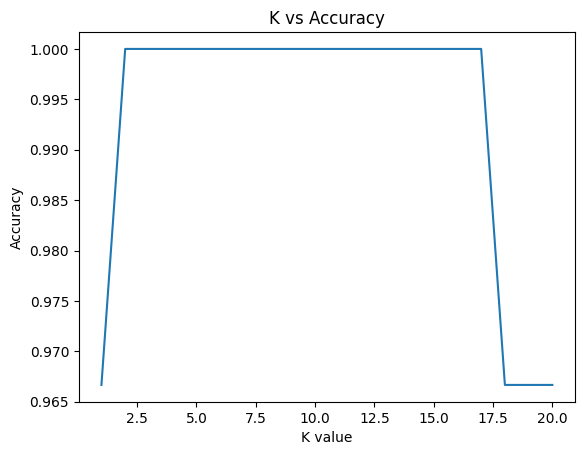

In [7]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [9]:
import pandas as pd
df=pd.read_csv("fitness_dataset.csv")

In [10]:
df

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,NaN,1.54,3.25,1,M,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,no,M,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,yes,M,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,F,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [12]:
df.isnull().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,160
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [13]:
df['sleep_hours']=df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe(include='O')

,smokes,gender
count,2000,2000
unique,4,2
top,yes,F
freq,711,1030


In [16]:
df['gender'].value_counts()


,count
gender,
F,1030
M,970


In [17]:
df['gender']=df['gender'].map({'F':0,'M':1})

In [18]:
df['smokes'].value_counts()

,count
smokes,
yes,711
0,581
no,518
1,190


In [19]:
df['smokes']=df['smokes'].map({'0':0,'no':0,'1':1,'yes':1})

In [20]:
x=df.drop('is_fit',axis=1)
y=df['is_fit']

In [21]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
x

array([[ 0.38421876, -1.56825968, -0.71734309, ...,  0.85464388,
        -0.90544807, -0.97043679],
       [ 1.10958094,  0.79808431,  0.44337494, ...,  0.16808395,
        -0.90544807, -0.97043679],
       [-0.17375214,  1.21567443,  0.75289975, ..., -0.85295389,
        -0.90544807, -0.97043679],
       ...,
       [ 1.55595766,  1.63326454,  0.21123134, ...,  0.31771881,
         1.10442556,  1.03046381],
       [ 0.71900131,  1.07647772, -0.79472429, ..., -0.53608008,
         1.10442556, -0.97043679],
       [ 0.10523331, -0.59388274, -0.21436527, ..., -1.74196098,
         1.10442556,  1.03046381]])

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors=27,metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [25]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.76


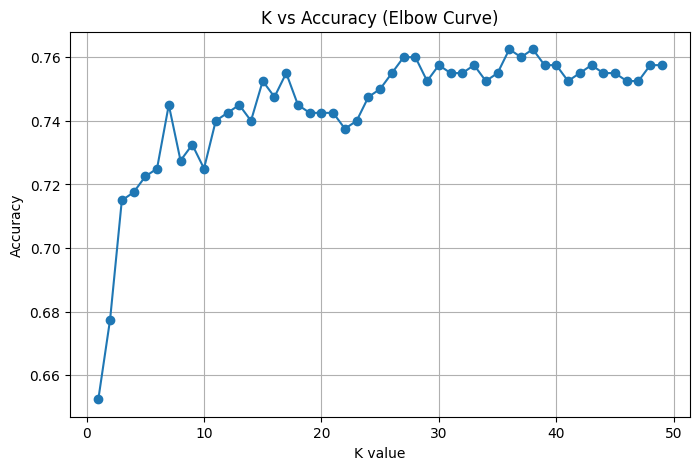

In [26]:
k_values = range(1, 50)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K vs Accuracy (Elbow Curve)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=4)
    print(f"K={k}, Accuracy={scores.mean():.4f}")

K=1, Accuracy=0.6831
K=2, Accuracy=0.7075
K=3, Accuracy=0.7300
K=4, Accuracy=0.7338
K=5, Accuracy=0.7394
K=6, Accuracy=0.7488
K=7, Accuracy=0.7469
K=8, Accuracy=0.7544
K=9, Accuracy=0.7525
K=10, Accuracy=0.7562
K=11, Accuracy=0.7537
K=12, Accuracy=0.7612
K=13, Accuracy=0.7619
K=14, Accuracy=0.7531
K=15, Accuracy=0.7625
K=16, Accuracy=0.7631
K=17, Accuracy=0.7644
K=18, Accuracy=0.7631
K=19, Accuracy=0.7650
K=20, Accuracy=0.7612
